<img src="../img/GTK_Logo_Social Icon.jpg" width=175 align="right" />


# Worksheet 6.0 Clustering - Answers

This worksheet covers concepts relating to Unsupervised Learning.  It should take no more than 20-30 minutes to complete.  Please raise your hand if you get stuck.  

There are many ways to accomplish the tasks that you are presented with, however you will find that by using the techniques covered in class, the exercises should be relatively simple. 

## Import the Libraries
For this exercise, we will be using:
* Pandas (https://pandas.pydata.org/pandas-docs/stable/)
* Numpy (https://docs.scipy.org/doc/numpy/reference/)
* Matplotlib (https://matplotlib.org/stable)


In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.spatial.distance import cdist
style.use("ggplot")
%matplotlib inline

# Clustering with Real Data
Let's try it on some real data and see what we can produce. As before the first step is to read in the data into a DataFrame.  

We will be using this data later, but the dataset consists of approximately 6000 domains--5000 of which were generated by various botnets and 1000 are from the Alexa 1 Million.  The columns are:

* `dsrc`:  The source of the domain
* `domain`:  The actual domain
* `length`:  The length of the domain
* `dicts`:  Percentage containing dictionary words
* `entropy`:  The entropy of the domain
* `numbers`:  The number of digits in the domain
* `ngram`:  Different n-grams which appear in the domain (?)

In [3]:
data = pd.read_csv('../data/dga-full.csv')
data.sample(5)

,dsrc,domain,length,dicts,entropy,numbers,ngram
8633,cryptolocker,ehprjldoupwsp,13,0.769231,3.334679,0,2.635484
38402,nivdort,whichcompe,10,1.000000,2.921928,0,8.959299
40576,nivdort,triedking,9,1.000000,2.947703,0,8.679285
45696,alexa,nycgo,5,0.600000,2.321928,0,0.778151
49768,alexa,hangoutmillionaire,18,1.000000,3.461320,0,22.754556


In [4]:
data['dsrc'].value_counts()

cryptolocker    10000
gameoverdga     10000
necurs          10000
alexa           10000
nivdort          9978
bamital          2500
Name: dsrc, dtype: int64

## Scaling the Data
Since clustering relies on measuring distances between objects it is important that all data points be on the same scale.  There are various methods for doing this, which are beyond the scope of this class, however, for this example, we will use scikit-learn's `StandardScaler` to accomplish this.  (http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

The StandardScaler transforms each column by:
* Subtracting from the element in each row the mean for each feature (column) and then taking this value and
* Dividing by that feature's (column's) standard deviation.

Scikit-learn has a transformer interface which is very similar to the other scikit-learn interfaces.  The basic steps are:
1.  Create the Scaler object
2.  Using the feature matrix, call the `.fit()` method to "train" the Scaler
3.  Use the `.transform()` method to scale the data.

**NOTE**: When using a Scaler, it is important to train the scaler on your data, and use this trained scalers on any future predictions. 

In [5]:
feature_columns = ['length', 'dicts','entropy','numbers','ngram']
scaled_feature_columns = ['scaled_length', 'scaled_dicts','scaled_entropy','scaled_numbers','scaled_ngram']

In [6]:
#Step 1:  Create the scaler
scaler = StandardScaler()

#Steps 2 & 3:  Fit the scaler and transform this data
scaled_df = scaler.fit_transform(data[feature_columns])

#Put the scaled data into a dataframe
scaled_df = pd.DataFrame(scaled_df, columns=scaled_feature_columns)

Take a look at the data and you'll see that the data is now all scaled consistently. 

In [7]:
scaled_df.sample(10)

,scaled_length,scaled_dicts,scaled_entropy,scaled_numbers,scaled_ngram
5086,-0.014622,0.411597,0.241666,-0.498385,-0.609769
13897,1.560515,-0.891871,1.218894,1.780156,-0.389685
34908,-0.277145,1.144799,-0.255995,-0.498385,1.167417
10911,-0.277145,-0.758704,0.274768,-0.498385,-0.520484
2348,2.216822,-1.089174,0.358741,3.299183,-0.699054
44312,-0.408407,1.144799,-0.256155,-0.498385,3.480791
22903,-0.014622,-0.138303,0.701661,-0.498385,-0.256220
47110,-1.327237,1.144799,-1.572375,-0.498385,-0.080355
15541,1.429253,-1.604706,1.551594,1.590278,-0.811719
1684,2.216822,-1.261018,0.742518,3.109305,-0.163457


Finally for convenience, we're going to merge the scaled data with the non-scaled data.  

In [8]:
final_data = pd.merge( data, scaled_df, left_index=True, right_index=True)

In [9]:
final_data.sample(5)

,dsrc,domain,length,dicts,entropy,numbers,ngram,scaled_length,scaled_dicts,scaled_entropy,scaled_numbers,scaled_ngram
12516,gameoverdga,16jrhki2lh3bc1hpvjap1vip5dq,27,0.222222,4.004344,7,1.204120,1.560515,-0.993705,1.329762,0.830764,-0.586389
21615,gameoverdga,12u7jbn10f52sup9actxoq3rv3,26,0.230769,4.392747,10,2.526339,1.429253,-0.970205,1.999749,1.400399,-0.338959
45877,alexa,chicagobusiness,15,1.000000,3.323231,0,28.012027,-0.014622,1.144799,0.154854,-0.498385,4.430236
23104,necurs,eewohsftb,9,0.555556,2.947703,0,1.505150,-0.802191,-0.077203,-0.492925,-0.498385,-0.530057
22402,gameoverdga,hylwfo1a56x1x1ijtlut1gldq15,27,0.333333,3.926572,8,0.954243,1.560515,-0.688204,1.195605,1.020643,-0.633149


### Your Turn!
Now that we have data that is suitable (maybe) for clustering, in the section below, perform K-Means clustering on this data set.  Initially, start out with 2 clusters and assign the `cluster id` as a column in your DataFrame.

Then do a `value_counts()` on the `dsrc` column for each cluster to see how the model divided the data.  Try various values for `k` to see how it performed.

Remember to use the **scaled features** for your clustering.  

In [10]:
## Your code here...

kmeans = KMeans(n_clusters=2, n_init=2).fit(final_data[scaled_feature_columns])

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print(labels)

[[-0.49775625  0.37181246 -0.38867842 -0.48935237  0.20120358]
 [ 1.56863505 -1.17173427  1.22488587  1.54215097 -0.6340754 ]]
[1 1 1 ... 0 0 0]


In [11]:
final_data['dsrc'].value_counts()

cryptolocker    10000
gameoverdga     10000
necurs          10000
alexa           10000
nivdort          9978
bamital          2500
Name: dsrc, dtype: int64

In [12]:
final_data['cluster_id'] = kmeans.labels_

In [13]:
final_data['cluster_id'].value_counts()

0    39842
1    12636
Name: cluster_id, dtype: int64

In [14]:
final_data[final_data['cluster_id'] == 1]['dsrc'].value_counts()

gameoverdga    9993
bamital        2500
necurs          140
alexa             3
Name: dsrc, dtype: int64

In [15]:
final_data[final_data['cluster_id'] == 0]['domain'].sample(5)

25060    eowdyqkwcpvbqldkqhg
12057         nuivqgjhyscibs
7794            nlhhjwsiuncd
25451         lvncuxdorcahiy
11434        rigtbufdcwomnhi
Name: domain, dtype: object

In [16]:
final_data['domain'][final_data['dsrc'] == 'cryptolocker'].sample(5)

11943      hjsqejbpiqvde
4907        qywilgabcgjr
11585       ftwvtwkdajrk
10439    ohadesldsagnimr
3566       pehmvfqvumkgm
Name: domain, dtype: object

In [17]:
final_data[final_data['dsrc'] == "bamital"]['domain'].sample(10)

73      02c7ee2ee3f166e80143f2c5ed59ade2
2083    6f5b0d3283b407c4f5039a64050df087
952     491de00bc9315566e30c137e02f46a16
1613    9162cba229b2feba3d962c4588034ae5
749     6f8bead1410b99c9bfde092e783969f8
1       cbaa81d976688b971a43a745795cbb0f
906     cff4c1289b1e54997c268e066444fe49
1809    ce5b9d0839397c02c9fdadef2c809d19
46      4ae2d080efb9cecaaa3dabff9ba54929
1038    dc5554bed978e5400a176fc3c7917aed
Name: domain, dtype: object

In [18]:
final_data[final_data['dsrc'] == "nivdort"]['domain'].sample(10)

36082         wifefeel
39401         meatthem
39190        offerwear
41054         whommark
33167        spotguess
33549         spotfeed
32962        songhello
42410        fairfruit
39240    musicnovember
41102         signmile
Name: domain, dtype: object

In [19]:
final_data[(final_data['cluster_id'] == 1) & (final_data['dsrc'] == 'necurs')]['domain']

22546    kujnifxvqwkpyytegqohv
22632     xwhqnkkesylwbydfnsxm
22711       wuiioaeyklhgcxwmad
22736       efkwmijhtpxsgrhfgq
22743      shngncqtfjlfhdjrtks
                 ...          
31897    pyskufklybvjhfpywtvlc
31956      ixhlkocwfwwdktjmdvj
32246     sxgkkqnnfjsoyhebpypw
32434    cqvkgxsntoevqbkxnyvyf
32456    qxvbbtlxhwguongdywukl
Name: domain, Length: 140, dtype: object

In [20]:
final_data.sample(5)

,dsrc,domain,length,dicts,entropy,numbers,ngram,scaled_length,scaled_dicts,scaled_entropy,scaled_numbers,scaled_ngram,cluster_id
27062,necurs,qrcajpfbms,10,0.800000,3.321928,0,1.146128,-0.670930,0.594898,0.152606,-0.498385,-0.597241,0
18307,gameoverdga,1i4bf6hwa5m1z14op22y1oxcle6,27,0.148148,4.162295,11,2.380211,1.560515,-1.197372,1.602223,1.590278,-0.366304,1
33499,nivdort,equalhunt,9,1.000000,2.947703,0,6.094876,-0.802191,1.144799,-0.492925,-0.498385,0.328829,0
8034,cryptolocker,ibkarffgbtfx,12,0.750000,3.022055,0,1.556303,-0.408407,0.457423,-0.364669,-0.498385,-0.520484,0
15062,gameoverdga,usgu36h0o9pvgntmy0rkltr5,24,0.250000,4.168296,6,2.000000,1.166731,-0.917330,1.612575,0.640886,-0.437454,1


## Food for thought:
Now that you've done clustering with various numbers of clusters, it appears that the data acutally does break evenly into 2 clusters.  Take a look at the original data and see if you can come up with a reason why that is the case.

## Visualizing Performance
As we already know, it is difficult to measure the performance of clustering models since there usually is no known ground truth from which to evaluate your model.  However, there are two techniques which 

The K-Elbow Visualizer implements the “elbow” method of selecting the optimal number of clusters for K-means clustering. K-means is a simple unsupervised machine learning algorithm that groups data into a specified number (k) of clusters. Because the user must specify in advance what k to choose, the algorithm is somewhat naive – it assigns all members to k clusters even if that is not the right k for the dataset.

The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion_score is computed, the sum of square distances from each point to its assigned center. Other metrics can also be used such as the silhouette_score, the mean silhouette coefficient for all samples or the calinski_harabaz_score, which computes the ratio of dispersion between and within clusters.

When these overall metrics for each model are plotted, it is possible to visually determine the best value for K. If the line chart looks like an arm, then the “elbow” (the point of inflection on the curve) is the best value of k. The “arm” can be either up or down, but if there is a strong inflection point, it is a good indication that the underlying model fits best at that point. (http://www.scikit-yb.org/en/latest/api/cluster/elbow.html)

In python there is a module called `YellowBrick` which facilitates visualizing the K-Elbow score.  All of YellowBrick's visualizations follow essentually the same pattern:

1.  Create the Visualizer Object
2.  Call the `.fit()` method using the data
3.  Call the `.show()` method to render the visualization

The snippet below demonstrates how to use the elbow method to visualize the clustering model's performance on this dataset.
```python
visualizer = KElbowVisualizer(KMeans(), k=(4,12))

visualizer.fit( feature_matrix ) 
visualizer.show()
```

### Your Turn!
In the box below, create a visualization using the elbow method to see if there are any inflection points in the distortion score.

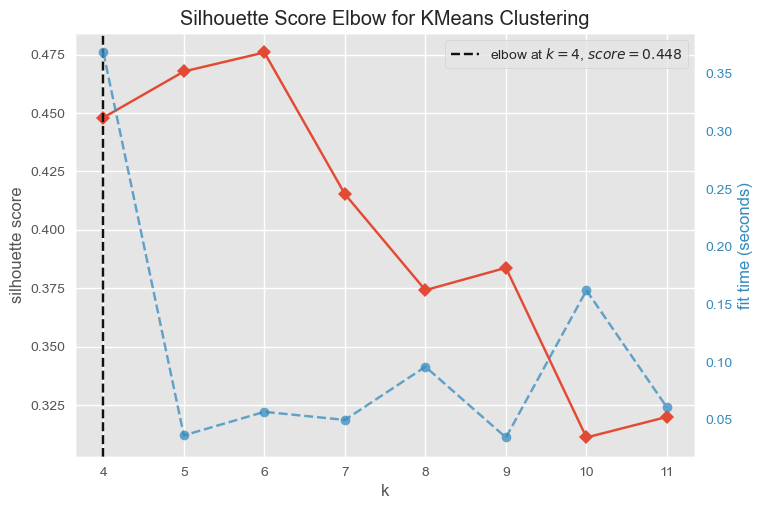

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [21]:
# Your code here...
visualizer = KElbowVisualizer( KMeans(n_init=2), k=(4,12), metric='silhouette')

visualizer.fit(final_data[scaled_feature_columns].sample(10000))
visualizer.show()

## Another Way to Visualize Clustering Performance
The Silhouette Coefficient is used when the ground-truth about the dataset is unknown and computes the density of clusters computed by the model. The score is computed by averaging the silhouette coefficient for each sample, computed as the difference between the average intra-cluster distance and the mean nearest-cluster distance for each sample, normalized by the maximum value. This produces a score between 1 and -1, where 1 is highly dense clusters and -1 is completely incorrect clustering. (http://www.scikit-yb.org/en/latest/api/cluster/silhouette.html)


### Your Turn!
Using the YellowBrick `SilhouetteVisualizer`, try visualizing models with various values of `K`.

**Note**:  This visualization is quite expensive, so I recommend performing this using a sample o your original data.

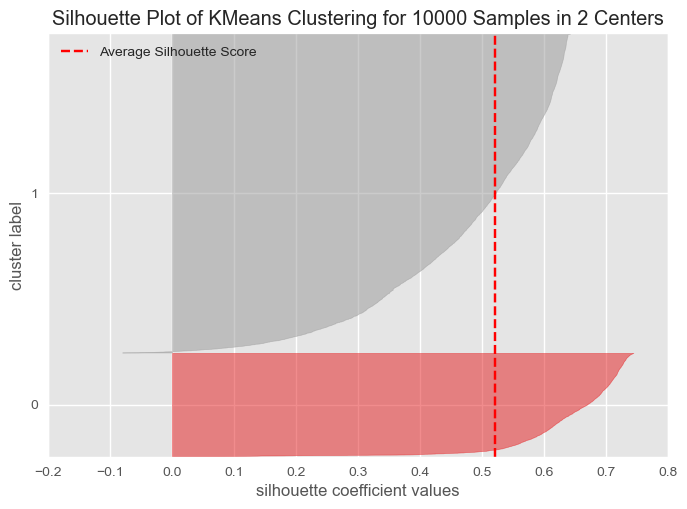

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 10000 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [22]:
# Your code here...
visualizer = SilhouetteVisualizer( KMeans(n_clusters=2, n_init=3))

visualizer.fit(final_data[scaled_feature_columns].sample(10000))
visualizer.show()

## DBSCAN
Now that you've tried K-Means, let's try doing some clustering using DBSCAN (http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html).  Remember that the main tuning parameters for DBSCAN are:

* **epsilon (eps)**:  The minimum distance between two samples 
* **min_samples**:  The minimum number of samples needed to form a neighborhood

By default epsilon is 0.5 and the min_samples is 5. First, try DBSCAN with the default options.  If you use the `fit_predict()` function, you can save the results in a new column in your data.  

How did this compare with K-Means?  Given that you actually know what the data really is, how did DBSCAN do in terms of identifing meaningful clusters?  Look at the `dsrc` column and do `value_counts()` for the various neighhborhoods.  What did you notice?

Try again, but this time experiment with the values of epsilon and min_samples and see what DBSCAN comes up with. 

In [23]:
dbscan = DBSCAN(min_samples=50)

In [24]:
final_data['dbs_default'] = dbscan.fit_predict(final_data[scaled_feature_columns])

In [25]:
final_data['dbs_default'].value_counts()

 1    39301
 2     9973
 0     2500
-1      284
 4      259
 3      116
 5       45
Name: dbs_default, dtype: int64

In [26]:
final_data[final_data['dbs_default'] == 1 ]['dsrc'].value_counts()

cryptolocker    10000
necurs           9990
nivdort          9978
alexa            9330
gameoverdga         3
Name: dsrc, dtype: int64

In [27]:
final_data[final_data['dbs_default'] == 1 ][['dsrc','domain']].sample(10)

,dsrc,domain
9446,cryptolocker,xvbnapiywfagvt
23140,necurs,huwvtreromwta
2731,cryptolocker,hufqjcrmgchih
41248,nivdort,whomwhole
35529,nivdort,thesefeel
6953,cryptolocker,bdtakobikoni
5404,cryptolocker,xiuadnbellohhw
28650,necurs,ngqhqqbduvjkdr
38321,nivdort,dreamgrow
7461,cryptolocker,lligwhttuxyqir


In [28]:
final_data[final_data['dbs_default'] == -1 ]['dsrc'].sample(10)

50809      alexa
49624      alexa
51698      alexa
43531      alexa
52446      alexa
2405     bamital
46545      alexa
47868      alexa
52264      alexa
49046      alexa
Name: dsrc, dtype: object

In [29]:
final_data['domain'][final_data['dsrc'] == "nivdort"].sample(5)

40241    drinkvoice
42410     fairfruit
39274      rockslow
38547      gladjune
40724     headthrow
Name: domain, dtype: object

In [30]:
final_data[final_data['dbs_default'] == 2 ]['dsrc'].value_counts()

gameoverdga    9973
Name: dsrc, dtype: int64

In [31]:
final_data[final_data['dbs_default'] == 1 ]['dsrc'].value_counts()

cryptolocker    10000
necurs           9990
nivdort          9978
alexa            9330
gameoverdga         3
Name: dsrc, dtype: int64

In [32]:
final_data[final_data['dsrc'] == "cryptolocker"]['domain'].sample(10)

10649       wbirarkhsfgf
8792        ffkwsvsieexl
11876      gkjsqegicfuxs
7565       btahdqypypsbp
12072     xjlepuhmjvycjt
8145     gxaakkrvirymuuk
11432    qnvysekkbpwpnmo
3825        qmvuvtftlhws
7031        hgttabqebluy
5041        iyiwxusxdvke
Name: domain, dtype: object

In [33]:
final_data[final_data['dsrc'] == "necurs"]['domain'].sample(10)

32316          ptgctebbvohb
31865    vwhilgweujpuliijvs
26512     ksyaqkudmuorqdsnx
30930           kmtleqvxqvk
24248     rtatnpxrleuyjfvmr
27666     rlgawlqrvgkskeisa
24989            uegqqmllfr
22616          defellojyrqw
22599            jhkoqfmwjo
26324     vrdimsspkhpbyvwjo
Name: domain, dtype: object